In [1]:
num_eps = [6,22,24,14,26,26,24,24,23]
episodes = []
epnames = []
for season in range(1,10):
    for ep in range(1,num_eps[season-1]+1):
        if ep < 10:
            ep_str = "s0" + str(season) + "e0" + str(ep)
        else:
            ep_str = "s0" + str(season) + "e" + str(ep)
        if (not (ep == 11 and season == 3) and not (season == 6 and (ep == 5 or ep == 18))):
            with open(ep_str, "r") as file:
                episodes.append(file.readline())
                epnames.append(ep_str)
        

In [2]:
with open("allep", "w+") as file:
    for episode in episodes:
        file.write(episode)
        file.write("\n")

In [3]:
import spacy

In [4]:
sp = spacy.load('en_core_web_sm')

In [5]:
sentence2 = sp("Manchester United isn't looking to sign any forward. Bla.")

In [6]:
for word in sentence2:  
    print(word.text)

Manchester
United
is
n't
looking
to
sign
any
forward
.
Bla
.


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from html import unescape

In [8]:
class MyAnalyzer(object):
    
    # load spaCy's english model and define the tokenizer/lemmatizer
    def __init__(self):
        spacy.load('en')
        self.lemmatizer_ = spacy.lang.en.English()
        
    # allow the class instance to be called just like
    # just like a function and applies the preprocessing and
    # tokenize the document
    def __call__(self, doc):
        doc_clean = unescape(doc).lower().replace("-"," ")
        #tokens = sp(doc_clean)
        #return([token.text for token in tokens])
        tokens = self.lemmatizer_(doc_clean)
        return([token.lemma_ for token in tokens])

    
#vectorizer = CustomVectorizer(stop_words = 'english')
analyzer = MyAnalyzer()
vectorizer = CountVectorizer(analyzer=analyzer, stop_words='english')

In [9]:
#vectorizer = CountVectorizer()
X = vectorizer.fit_transform(episodes)

In [10]:
df = pd.DataFrame(X.toarray())

In [11]:
vectorizer

CountVectorizer(analyzer=<__main__.MyAnalyzer object at 0x1a1fb2c908>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [12]:
for i in vectorizer.get_feature_names():
    if '-' in i:
        print(i)

-PRON-
spin-dry


In [13]:
df.shape

(186, 15114)

In [14]:
df = df.div(df.sum(axis=1), axis=0)

In [15]:
df.to_csv("bow.tsv", sep='\t', header=vectorizer.get_feature_names(), index=False)

In [16]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(df)
X_transformed.shape

(186, 2)

In [17]:
dft = pd.DataFrame(X_transformed)
dft.head()

,0,1
0,-0.017179,-0.026060
1,-0.011241,-0.018397
2,-0.006096,-0.036612
3,0.004359,-0.031490
4,0.029651,-0.023649


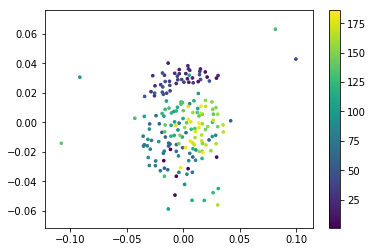

In [23]:
from matplotlib import pyplot as plt
f1 = dft[0].values
f2 = dft[1].values
c = list(range(1,187))
plt.scatter(f1, f2, c=c, s=7)
plt.colorbar()

In [19]:
from scipy.spatial.distance import pdist, squareform

distances = pdist(dft.values, metric='euclidean')
dist_matrix = squareform(distances)


In [20]:
dMatrix = pd.DataFrame(dist_matrix)

In [21]:
dMatrix.head()

,0,1,2,3,4,5,6,7,8,9,...,176,177,178,179,180,181,182,183,184,185
0,0.000000,0.009695,0.015303,0.022212,0.046892,0.025367,0.072918,0.068554,0.061737,0.070546,...,0.026131,0.035768,0.021167,0.026999,0.015710,0.049491,0.038424,0.035461,0.035270,0.040187
1,0.009695,0.000000,0.018928,0.020367,0.041228,0.031272,0.063230,0.058883,0.052159,0.060922,...,0.016870,0.026112,0.013308,0.018448,0.015359,0.039825,0.029253,0.025767,0.028990,0.030812
2,0.015303,0.018928,0.000000,0.011643,0.038024,0.012862,0.075501,0.072667,0.067102,0.075285,...,0.034414,0.039248,0.021113,0.026868,0.006979,0.052284,0.038660,0.040078,0.028653,0.041210
3,0.022212,0.020367,0.011643,0.000000,0.026479,0.021380,0.066410,0.064457,0.059785,0.067394,...,0.031245,0.032029,0.014566,0.018801,0.006600,0.043884,0.029528,0.033550,0.017194,0.032352
4,0.046892,0.041228,0.038024,0.026479,0.000000,0.045038,0.053645,0.055015,0.053811,0.058694,...,0.042054,0.033179,0.028407,0.025719,0.032653,0.037235,0.025472,0.036019,0.012368,0.027942


In [28]:
dft.index[dft[0] > 0.05].tolist()

[40, 128]

In [30]:
epnames[128]

's07e14'

In [29]:
epnames[40]

's03e14'

In [27]:
epnames[99]

's06e10'

In [26]:
epnames[138]

's07e24'

In [67]:
pd.DataFrame.idxmax(dft,axis=0)

0    102
1     15
dtype: int64

In [68]:
dMatrix.to_csv("dist.tsv", sep=',', header=epnames, index=False)

In [ ]:
from skbio.stats.distance import DissimilarityMatrix
dm = DissimilarityMatrix()